In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns

names_bw=['time', 'bw', 'op1', 'size', 'op2' ]
names_latency=['op1', 'latency', 'op2', 'write_size', 'op3']

### HM-LS test: device is 75% full  (150GB are occupied, device size is 200GB, and  get random overwrites for 100GB)
### bs=4K and bs=1MB

### bs=4KB

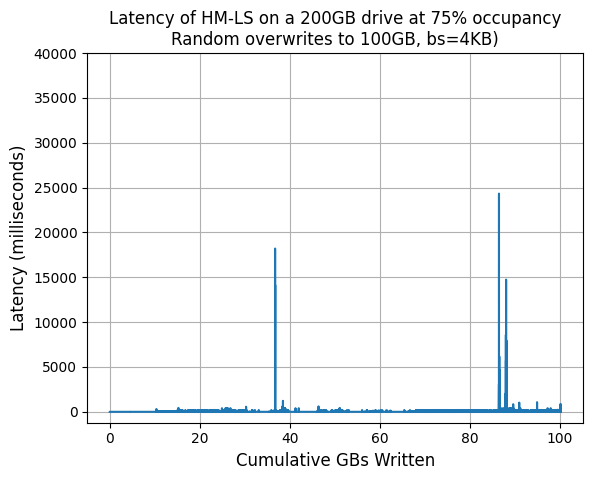

In [34]:
df_latency = pd.read_csv("remainder/hmls_0.75pctfull_100gb_overwrite/filledup/zoned/200GB/qd1/bs4KB/lat_log_lat.1.log", sep=",", names=names_latency)

#process the bw data
df_latency['latency'] = df_latency['latency'] / (1000*1000)  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df_latency['cumulative_gb'] = df_latency['write_size'].cumsum() / (1024**3)

#Create the line plots
# plt.plot(df1.index, df1['latency'], linestyle='-')
plt.plot(df_latency['cumulative_gb'], df_latency['latency'], linestyle='-')
# Add labels and title
plt.xlabel('Cumulative GBs Written', fontsize=12)
# plt.xticks(np.arange(0, 45, 5))
plt.ylabel('Latency (milliseconds)', fontsize=12)
plt.yticks(np.arange(0, 45000, 5000))
plt.title('Latency of HM-LS on a 200GB drive at 75% occupancy\nRandom overwrites to 100GB, bs=4KB)', fontsize=12)

# Show the plot
plt.grid(True)  # Optionally, add grid lines
plt.savefig('fig/final/hmls_latency_200gb_75pctfull_100gb_overwrite_bs4KB.png', dpi=300, bbox_inches='tight')
plt.show()

### bs=1MB

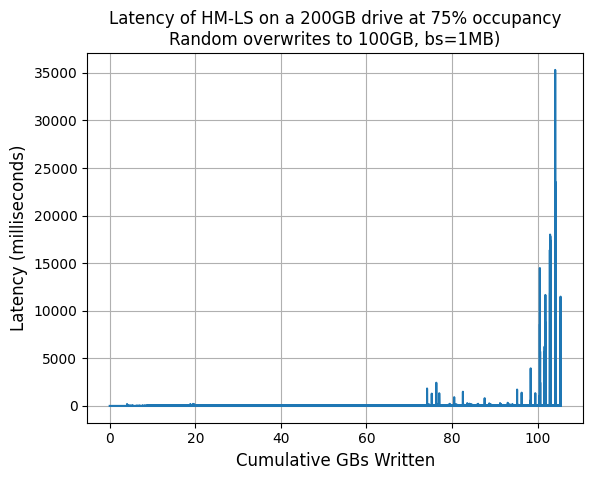

In [46]:
df_latency = pd.read_csv("remainder/hmls_0.75pctfull_100gb_overwrite/filledup/zoned/200GB/qd1/bs1MB/lat_log_lat.1.log", sep=",", names=names_latency)

#process the bw data
df_latency['latency'] = df_latency['latency'] / (1000*1000)  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df_latency['cumulative_gb'] = df_latency['write_size'].cumsum() / (1024**3)

# #filter df_data with the cumulative_gb column < 80
# df_latency = df_latency[df_latency['cumulative_gb'] < 80]
# print(df_latency)
#Create the line plots
# plt.plot(df1.index, df1['latency'], linestyle='-')
# plt.figure(figsize=(20, 5))
plt.plot(df_latency['cumulative_gb'], df_latency['latency'], linestyle='-')
# Add labels and title
plt.xlabel('Cumulative GBs Written', fontsize=12)
# plt.xticks(np.arange(0, 45, 5))
plt.ylabel('Latency (milliseconds)', fontsize=12)
# plt.yticks(np.arange(0, 45000, 5000))
plt.title('Latency of HM-LS on a 200GB drive at 75% occupancy\nRandom overwrites to 100GB, bs=1MB)',fontsize=12)
# plt.yscale('log')
# Show the plot
plt.grid(True)  # Optionally, add grid lines
plt.savefig('fig/final/hmls_latency_200gb_75pctfull_100gb_overwrite_bs1MB.png', dpi=300, bbox_inches='tight')
plt.show()

------------------

### 124 Writes

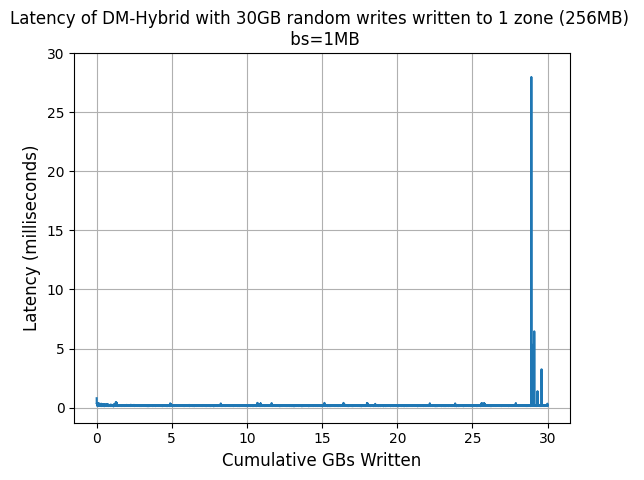

In [36]:
df_latency = pd.read_csv("remainder/124writes/124Writes/round1/lat_log_avg_lat.1.log", sep=",", names=names_latency)

#process the bw data
df_latency['latency'] = df_latency['latency'] / (1000*1000)  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df_latency['cumulative_gb'] = df_latency['write_size'].cumsum() / (1024**3)

#Create the line plots
# plt.plot(df1.index, df1['latency'], linestyle='-')
plt.plot(df_latency['cumulative_gb'], df_latency['latency'], linestyle='-')
# Add labels and title
plt.xlabel('Cumulative GBs Written', fontsize=12)
# plt.xticks(np.arange(0, 45, 5))
plt.ylabel('Latency (milliseconds)',fontsize=12)
# plt.yscale('log')
plt.yticks(np.arange(0, 35, 5))
plt.title('Latency of DM-Hybrid with 30GB random writes written to 1 zone (256MB) \n bs=1MB',fontsize=12)

# Show the plot
plt.grid(True)  # Optionally, add grid lines
plt.savefig('fig/final/dmhybrid_latency_256mb_overwrite_bs1MB.png', dpi=300, bbox_inches='tight')
plt.show()

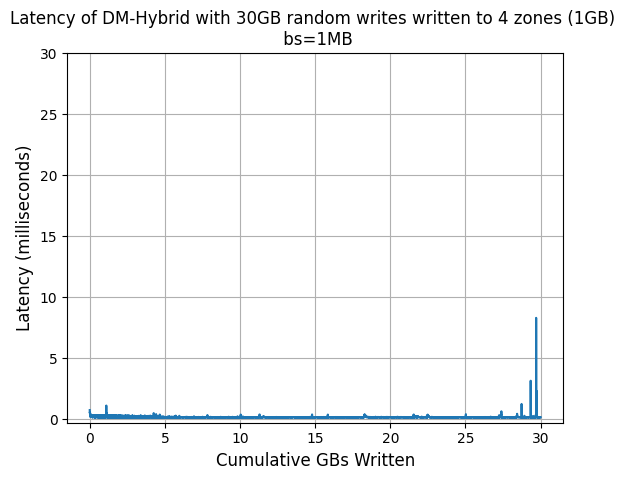

In [37]:
df_latency = pd.read_csv("remainder/124writes/124Writes/round2/lat_log_avg_lat.1.log", sep=",", names=names_latency)

#process the bw data
df_latency['latency'] = df_latency['latency'] / (1000*1000)  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df_latency['cumulative_gb'] = df_latency['write_size'].cumsum() / (1024**3)

#Create the line plots
# plt.plot(df1.index, df1['latency'], linestyle='-')
plt.plot(df_latency['cumulative_gb'], df_latency['latency'], linestyle='-')
# Add labels and title
plt.xlabel('Cumulative GBs Written', fontsize=12)
# plt.xticks(np.arange(0, 45, 5))
plt.ylabel('Latency (milliseconds)', fontsize=12)
plt.yticks(np.arange(0,35, 5))
plt.title('Latency of DM-Hybrid with 30GB random writes written to 4 zones (1GB) \n bs=1MB', fontsize=12)

# Show the plot
plt.grid(True)  # Optionally, add grid lines
plt.savefig('fig/final/dmhybrid_latency_1gb_overwrite_bs1MB.png', dpi=300, bbox_inches='tight')
plt.show()

### Host Managed drive test -- Flushing disabled


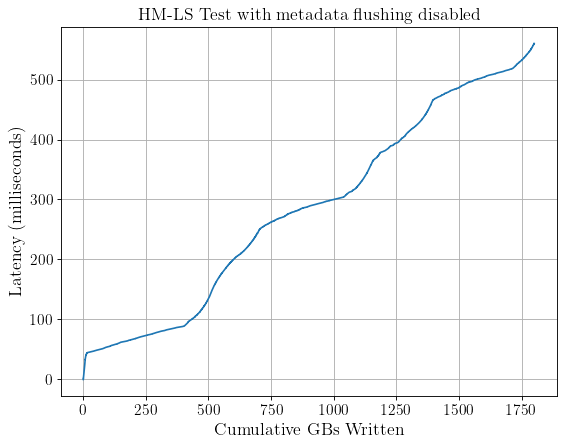

In [4]:
df= pd.read_csv("remainder/host_managed/1M/lat_log_lat.1.log", sep=",", names=names_latency)

# #process the bw data
# df_latency['latency'] = df_latency['latency'] / (1000*1000)  # Convert nanoseconds to microseconds
# # Calculate cumulative GBs of data written
# df_latency['cumulative_gb'] = df_latency['write_size'].cumsum() / (1024**3)
#rename column op1 to Time
df.rename(columns={'op1':'time'}, inplace=True)
df['cumulative_gb'] = df['write_size'].cumsum() / (1024**3)
df['time'] = df['time'] / 1000 
df = df.sort_values(by='time')

#Create the line plots
plt.figure(figsize=(8, 6), dpi=80)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.plot(df['time'], df['cumulative_gb'], linestyle='-')
# Add labels and title
plt.xlabel('Cumulative GBs Written', fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel('Latency (milliseconds)', fontsize=16)
plt.yticks(fontsize=14)
plt.title('HM-LS Test with metadata flushing disabled', fontsize=16)

# Show the plot
plt.grid(True)  # Optionally, add grid lines
plt.savefig('fig/final/hmls_bs1M_noflush.pdf', dpi=300, bbox_inches='tight')
plt.show()